In [1]:
import os 
import sys
import glob
import time
from tqdm import tqdm

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


import MDAnalysis as mda 
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align

In [2]:
df = pd.read_pickle('rmdf_nsp10-16_all.pkl')

In [3]:
contact_info = pd.read_pickle('contact_res_nsp10_nsp16.pkl')
contact_info['y'] = 0
contact_info.head()

chain resname  resnum  y
0  nsp10     THR    4292  0
1  nsp10     ASN    4293  0
2  nsp10     CYS    4294  0
3  nsp10     VAL    4295  0
4  nsp10     LYS    4296  0

In [4]:
df.sys_name.unique()

array(['comp_0_000', 'comp_1_000', 'comp_2_000', 'comp_sah_0_000',
       'comp_sah_1_000', 'comp_sah_2_000', 'comp_sam_0_000',
       'comp_sam_1_000', 'comp_sam_2_000', 'comp_sfg_0_000',
       'comp_sfg_1_000', 'comp_sfg_2_000', 'nsp10_0', 'nsp10_1',
       'nsp10_2', 'nsp16_0', 'nsp16_1', 'nsp16_2', 'nsp16_sah_0',
       'nsp16_sah_2', 'nsp16_sam_0', 'nsp16_sam_1', 'nsp16_sam_2',
       'nsp16_sfg_0', 'nsp16_sfg_1', 'nsp16_sfg_2', 'comp_005',
       'comp_010', 'comp_015', 'comp_020', 'comp_025', 'comp_030',
       'comp_035', 'comp_040', 'comp_045', 'comp_050', 'comp_055',
       'comp_060', 'comp_065', 'comp_070', 'comp_075', 'comp_080',
       'comp_085', 'comp_090', 'comp_095', 'comp_100', 'comp_sah_005',
       'comp_sah_010', 'comp_sah_015', 'comp_sah_020', 'comp_sah_025',
       'comp_sah_030', 'comp_sah_035', 'comp_sah_040', 'comp_sah_045',
       'comp_sah_050', 'comp_sah_055', 'comp_sah_060', 'comp_sah_065',
       'comp_sah_070', 'comp_sah_075', 'comp_sah_080', 'comp_sah

In [5]:
df.head()

sys_name resname  resnum  chain      rmsf
0  comp_0_000     ALA    6798  nsp16  9.228327
1  comp_0_000     SER    6799  nsp16  7.519331
2  comp_0_000     SER    6800  nsp16  5.815448
3  comp_0_000     GLN    6801  nsp16  3.933446
4  comp_0_000     ALA    6802  nsp16  2.563892

In [6]:
%run ~/.mpl_set.py

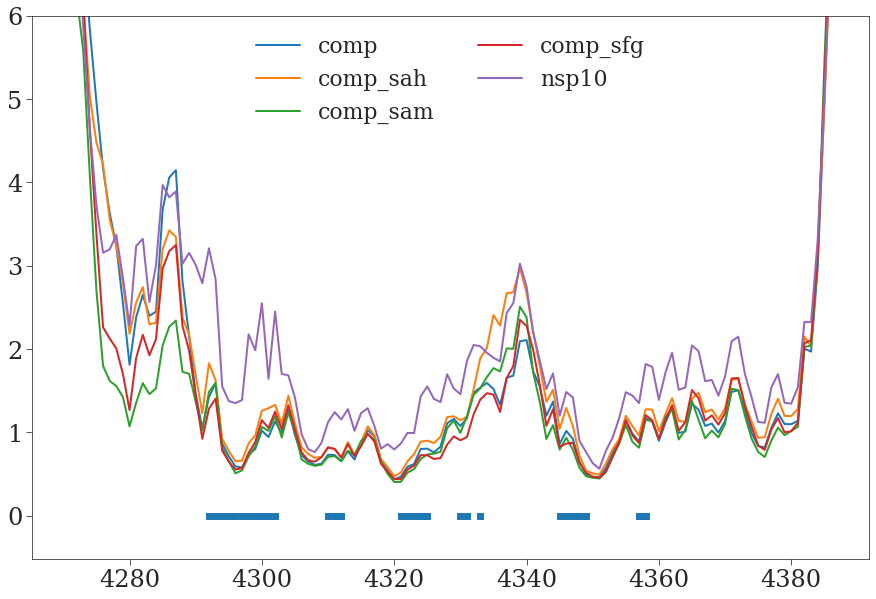

In [7]:
fig, ax = plt.subplots( figsize=(15,10)) 
n_traj = 0 

chain = 'nsp10'
sub_df = df[df['chain'] == chain]
contact_df = contact_info[contact_info['chain'] == chain]

sub_df = sub_df[(sub_df.sys_name.str.endswith('000')) | (sub_df.sys_name.str.startswith('nsp'))]

grp_names = [sys_name[:-6] if sys_name.startswith('comp') else sys_name[:-2] for sys_name in sub_df.sys_name]
sub_df['group'] = grp_names
grp_names = list(set(grp_names))

for grp_name in sorted(grp_names): 
    sub_sub_df = sub_df[sub_df['group'] == grp_name]
    rmsf = []
    for sys_name in sub_sub_df.sys_name.unique(): 
        res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
        rmsf.append(sub_sub_df[sub_sub_df.sys_name == sys_name]['rmsf'].to_numpy())
#     chain_df = sub_df[sub_df.chain == chain]
    res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
    rmsf = np.mean(rmsf, axis=0)
    err_rmsf = np.std(rmsf, axis=0)
    ax.plot(res_num, rmsf, label=f'{grp_name}',) 
#     ax.errorbar(res_num, rmsf, yerr=err_rmsf, label=f'{grp_name}',) 
    
ax.scatter(contact_df['resnum'], contact_df['y'], marker='s')

ylim = ax.get_ylim()
ax.set_ylim([ylim[0], 6])
plt.legend(ncol=2)

fig.savefig('rmsf_nsp10.png', bbox_inches='tight')

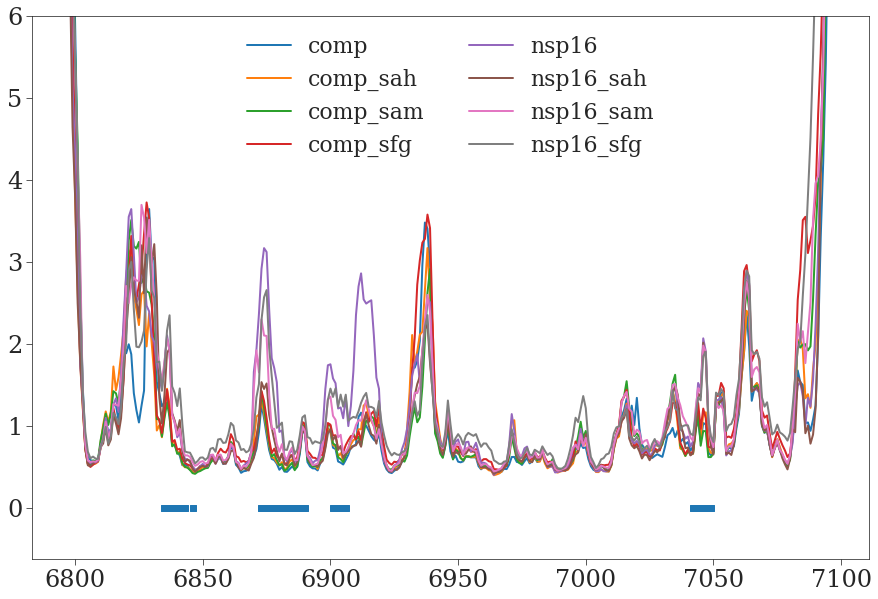

In [8]:
fig, ax = plt.subplots( figsize=(15,10)) 
n_traj = 0 

chain = 'nsp16'
sub_df = df[df['chain'] == chain]

contact_df = contact_info[contact_info['chain'] == chain]
sub_df = sub_df[(sub_df.sys_name.str.endswith('000')) | (sub_df.sys_name.str.startswith('nsp'))]

grp_names = [sys_name[:-6] if sys_name.startswith('comp') else sys_name[:-2] for sys_name in sub_df.sys_name]
sub_df['group'] = grp_names
grp_names = list(set(grp_names))

for grp_name in sorted(grp_names): 
    sub_sub_df = sub_df[sub_df['group'] == grp_name]
    rmsf = []
    for sys_name in sub_sub_df.sys_name.unique(): 
        res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
        rmsf.append(sub_sub_df[sub_sub_df.sys_name == sys_name]['rmsf'].to_numpy())
#     chain_df = sub_df[sub_df.chain == chain]
    res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
    rmsf = np.mean(rmsf, axis=0)
    err_rmsf = np.std(rmsf, axis=0)
    ax.plot(res_num, rmsf, label=f'{grp_name}',) 
#     ax.errorbar(res_num, rmsf, yerr=err_rmsf, label=f'{grp_name}',) 
    
ax.scatter(contact_df['resnum'], contact_df['y'], marker='s')

ylim = ax.get_ylim()
ax.set_ylim([ylim[0], 6])
plt.legend(ncol=2)

fig.savefig('rmsf_nsp16.png', bbox_inches='tight')

['comp_sah', 'comp_sfg', 'comp', 'comp_sam']
['nsp16', 'nsp16_sam', 'nsp16_sah', 'nsp16_sfg']


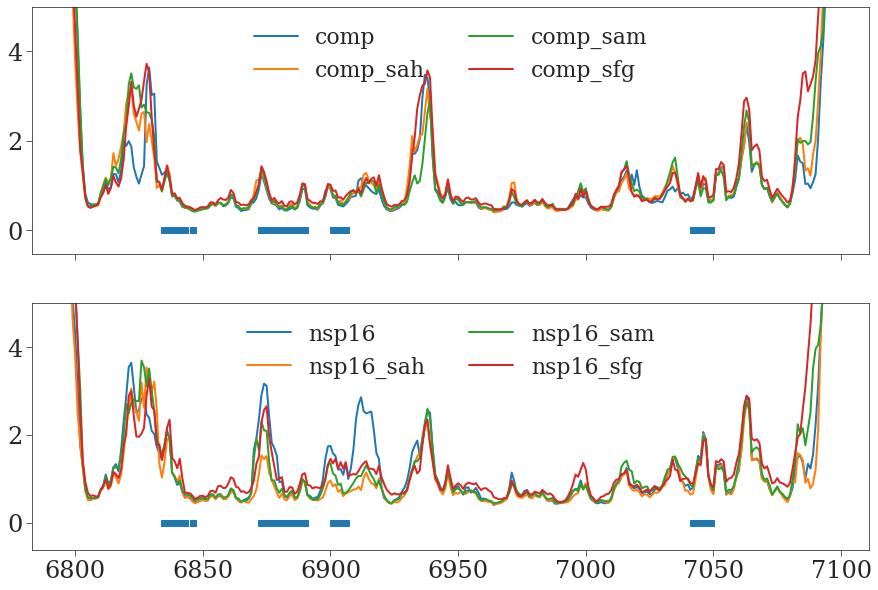

In [10]:
fig, axes = plt.subplots(2, figsize=(15,10), sharex=True) 
n_traj = 0 

sub_sys = ['000', 'nsp']
for sub, ax in zip(sub_sys, axes):
    chain = 'nsp16'
    sub_df = df[df['chain'] == chain]

    contact_df = contact_info[contact_info['chain'] == chain]
    # sub_df = sub_df[(sub_df.sys_name.str.endswith('000')) | (sub_df.sys_name.str.startswith('nsp'))]
    
    sub_df = sub_df[sub_df.sys_name.str.startswith(sub)] if sub == 'nsp' else sub_df[sub_df.sys_name.str.endswith(sub)]

    grp_names = [sys_name[:-6] if sys_name.startswith('comp') else sys_name[:-2] for sys_name in sub_df.sys_name]
    sub_df['group'] = grp_names
    grp_names = list(set(grp_names))
    print(grp_names)

    for grp_name in sorted(grp_names): 
        sub_sub_df = sub_df[sub_df['group'] == grp_name]
        rmsf = []
        for sys_name in sub_sub_df.sys_name.unique(): 
            res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
            rmsf.append(sub_sub_df[sub_sub_df.sys_name == sys_name]['rmsf'].to_numpy())
    #     chain_df = sub_df[sub_df.chain == chain]
        res_num = sub_sub_df[sub_sub_df.sys_name == sys_name]['resnum'].to_numpy()
        rmsf = np.mean(rmsf, axis=0)
        err_rmsf = np.std(rmsf, axis=0)
        ax.plot(res_num, rmsf, label=f'{grp_name}',) 
    #     ax.errorbar(res_num, rmsf, yerr=err_rmsf, label=f'{grp_name}',) 

    ax.scatter(contact_df['resnum'], contact_df['y'], marker='s')

    ylim = ax.get_ylim()
    ax.set_ylim([ylim[0], 5])
    ax.legend(ncol=2)

fig.savefig('rmsf_nsp16_sep.png', bbox_inches='tight')

# load contact residues. 

In [6]:
contact_info = pd.read_pickle('contact_res_nsp10_nsp16.pkl')
contact_info['y'] = 0
contact_info.head()

chain resname  resnum  y
0  nsp10     THR    4292  0
1  nsp10     ASN    4293  0
2  nsp10     CYS    4294  0
3  nsp10     VAL    4295  0
4  nsp10     LYS    4296  0

In [7]:
import plotly.express as px
import plotly.graph_objects as go

chain = 'nsp10'
sub_df = df[df['chain'] == chain]

contact_df = contact_info[contact_info['chain'] == chain]
fig1 = px.line(sub_df, x="resnum", y="rmsf", color="sys_name",
#               line_group="country", 
              hover_data=['resname'])

fig2 = px.scatter(contact_df, x='resnum', y='y', hover_data=['resname'])

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()
fig3.write_html("rmsf_nsp10.html")

In [15]:
import plotly.express as px
import plotly.graph_objects as go

chain = 'nsp16'
sub_df = df[df['chain'] == chain]

contact_df = contact_info[contact_info['chain'] == chain]
fig1 = px.line(sub_df, x="resnum", y="rmsf", color="sys_name",
#               line_group="country", 
              hover_data=['resname'])

fig2 = px.scatter(contact_df, x='resnum', y='y', hover_data=['resname'])

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()
fig3.write_html("rmsf_nsp16.html")